# AccelerateAI - Data Science Global Bootcamp

### Multiple Linear Regression

#### How do we handle the following in MLR?
- Comparing Coefficients 
- Non-Linearity
- Multi-Collinearity
- High dimensionality

### 1. Standardized Coefficients 

Since the regression coefficients b1, …, bk may all be in different measurement units, direct comparison is difficult.

The standardized regression coefficients eliminate this problem by expressing the coefficients in terms of a single, common set of statistically reasonable units so that comparison may at least be attempted.

The standardized regression coefficient, found by multiplying the regression coefficient bi by SD(Xi) and dividing it by SD(Y), represents the expected change in Y (one standard deviation) due to an increase in one standardized unit of Xi, with all other X variables unchanged. 

In [1]:
import numpy as np
import pandas as pd 
from scipy.stats.mstats import zscore

import seaborn as sbn 
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
# Load the dataset
truck_df = pd.read_excel("04_TruckMaintenance.xlsx", sheet_name='Data')
truck_df.head(5)

,Truck,Maintenance Expense,Miles Driven,Age of Truck
0,1,908.56,10500,10
1,2,751.12,9700,7
2,3,793.55,9200,8
3,4,619.61,8300,9
4,5,380.11,6500,5


In [3]:
# Training a linear regression model 
Y = truck_df["Maintenance Expense"]

X = truck_df[['Miles Driven', 'Age of Truck']]
X = sm.add_constant(X) # adding a constant

reg_model = sm.OLS(Y,X).fit()

In [4]:
print(reg_model.summary())                 # Can we compare the coefficients ?

                             OLS Regression Results                            
Dep. Variable:     Maintenance Expense   R-squared:                       0.951
Model:                             OLS   Adj. R-squared:                  0.946
Method:                  Least Squares   F-statistic:                     195.0
Date:                 Sun, 28 Aug 2022   Prob (F-statistic):           7.62e-14
Time:                         15:34:15   Log-Likelihood:                -127.47
No. Observations:                   23   AIC:                             260.9
Df Residuals:                       20   BIC:                             264.3
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4184     29.191    

In [5]:
from scipy.stats.mstats import zscore

X = truck_df[['Miles Driven', 'Age of Truck']]
print(zscore(X))

    Miles Driven  Age of Truck
0       1.228764      1.446501
1       0.993496      0.504911
2       0.846453      0.818774
3       0.581777      1.132638
4       0.052424     -0.122816
5      -0.535746     -1.064406
6      -0.829831     -1.064406
7      -1.212141     -0.750543
8      -1.329775     -1.064406
9       1.022904      0.504911
10      0.081832     -0.122816
11     -0.800423     -1.378270
12     -1.123916     -0.750543
13     -0.947465     -0.750543
14      0.611185      1.446501
15      0.993496      1.132638
16     -1.329775     -0.436680
17      1.081721      1.760364
18      1.022904      0.818774
19      1.052313      0.504911
20     -1.535635     -1.378270
21     -1.094507     -1.378270
22      1.169947      0.191047


In [6]:
# Standardize the data 
std_Y = zscore(Y)
std_X = zscore(X)
std_X = sm.add_constant(std_X) 

# Fit the model on standardized data to get standardized coefficients 
std_reg_model = sm.OLS(std_Y, std_X).fit()
print(std_reg_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Maintenance Expense   R-squared:                       0.951
Model:                             OLS   Adj. R-squared:                  0.946
Method:                  Least Squares   F-statistic:                     195.0
Date:                 Sun, 28 Aug 2022   Prob (F-statistic):           7.62e-14
Time:                         15:34:15   Log-Likelihood:                 2.1007
No. Observations:                   23   AIC:                             1.799
Df Residuals:                       20   BIC:                             5.205
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.261e-16      0.049   -

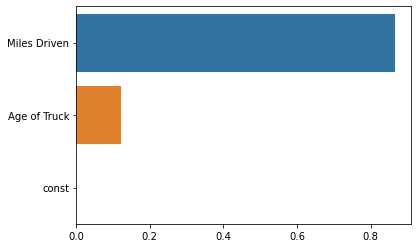

In [7]:
coeff = std_reg_model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sbn.barplot(x=coeff.values, y=coeff.index, orient='h');

##### The absolute values of the standardized regression coefficients can be compared, to ascertain the relative importance of the variables.

Miles Driven has 7X more impact than Age of Truck on Maintenance cost.

### 2. Non-Linearity

In [8]:
# Load the dataset
power_df = pd.read_csv('05_PowerGeneration_Data.csv')
power_df.head(5)

,Month,Cost,Units
0,1,45623,601
1,2,46507,738
2,3,43343,686
3,4,46495,736
4,5,47317,756


##### We want to predict the cost using units. 
Let's try a linear regression first.

In [9]:
# Training a linear regression model 
Y = power_df.Cost
X = sm.add_constant(power_df.Units)

sm.OLS(Y,X).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     94.75
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           2.32e-11
Time:                        15:34:15   Log-Likelihood:                -334.94
No. Observations:                  36   AIC:                             673.9
Df Residuals:                      34   BIC:                             677.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.365e+04   1917.137     12.337      0.000    1.98e+04    2.75e+04
Units         30.5331      3.137      9.734      0.000      24.158      36.908
==============================================================================
Omnibus:                        4.527   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                1.765
Skew:                          -0.042   Prob(JB):                        0.414
Kurtosis:                       1.918   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

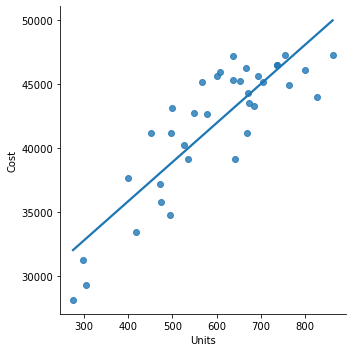

In [10]:
# Let's check how good the fit is.
sbn.lmplot(data=power_df, x='Units', y='Cost', ci=None)
plt.show()

In [11]:
# Let's add a square term 
power_df["SqUnits"] = np.square(power_df.Units)

In [12]:
Y = power_df.Cost
X = power_df[['Units', 'SqUnits']]
X = sm.add_constant(X)

sm.OLS(Y,X).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     75.98
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           4.45e-13
Time:                        15:34:15   Log-Likelihood:                -327.88
No. Observations:                  36   AIC:                             661.8
Df Residuals:                      33   BIC:                             666.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5792.7983   4763.058      1.216      0.233   -3897.717    1.55e+04
Units         98.3504     17.237      5.706      0.000      63.282     133.419
SqUnits       -0.0600      0.015     -3.981      0.000      -0.091      -0.029
==============================================================================
Omnibus:                        2.245   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                2.021
Skew:                          -0.553   Prob(JB):                        0.364
Kurtosis:                       2.651   Cond. No.                     5.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### The Adjusted R-squared increased from 0.728 to 0.811, after adding the square term.

<b>Regression Equation: Cost = 98.35 * Units - 0.06 * (Unit)^2 </b>

In [13]:
# Now let's try a different transformation 

Y = np.log10(power_df.Cost)
X = sm.add_constant(power_df.Units)

sm.OLS(Y,X).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     90.74
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           3.99e-11
Time:                        15:34:15   Log-Likelihood:                 74.303
No. Observations:                  36   AIC:                            -144.6
Df Residuals:                      34   BIC:                            -141.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4121      0.022    199.045      0.000       4.367       4.457
Units          0.0003   3.63e-05      9.526      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.455   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                1.612
Skew:                          -0.126   Prob(JB):                        0.447
Kurtosis:                       1.994   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### The Adjusted R-squared for the log model is 0.719

### 3. Multi Collinearity 

In [14]:
# Load the dataset
profit_df = pd.read_csv('06_PharmacyProfit_Data.csv')
profit_df.head(5)

,Location,RetailProfit,Income,DisposableIncome,BirthRate,SSCCoverageperThousand,CVDeathsperMillion,SeniorPercentage
0,"Albany-Schenectady-Troy,NY",199780,28719,22701,13.1,177.7,429.9,14.6
1,"Albuquerque,NM",165530,25835,19890,15.8,143.8,222.9,10.7
2,"Altoona,PA",208670,22675,18051,11.6,179.8,561.5,17.6
3,"Anchorage,AK",166890,33501,27031,18.5,62.5,99.8,4.7
4,"Appleton-Oshkosh-Neenah,WI",209190,27107,21182,13.6,152.6,319.4,12.0


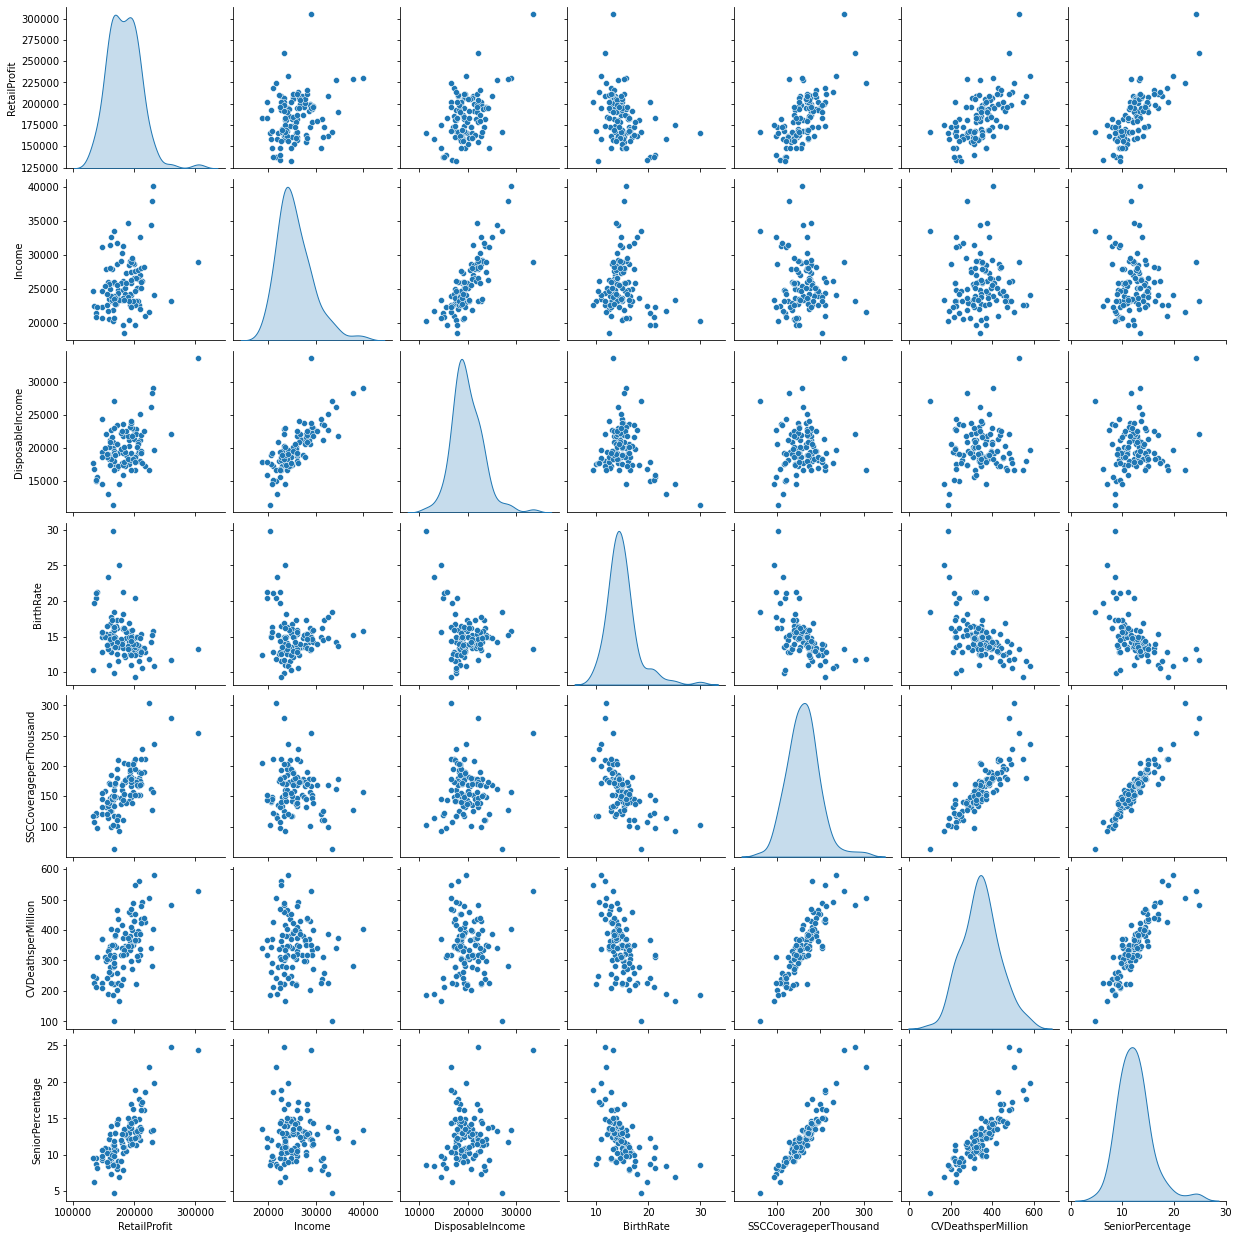

In [15]:
# Check for relationship 
sbn.pairplot(profit_df.drop(columns="Location"), diag_kind='kde')

In [16]:
# Check for correlation 
profit_df.drop(columns="Location").corr()

,RetailProfit,Income,DisposableIncome,BirthRate,SSCCoverageperThousand,CVDeathsperMillion,SeniorPercentage
RetailProfit,1.000000,0.264189,0.474030,-0.346955,0.667838,0.609221,0.774006
Income,0.264189,1.000000,0.777336,-0.090546,-0.129612,-0.050192,-0.056456
DisposableIncome,0.474030,0.777336,1.000000,-0.256004,0.062751,0.056417,0.164917
BirthRate,-0.346955,-0.090546,-0.256004,1.000000,-0.584519,-0.549885,-0.553926
SSCCoverageperThousand,0.667838,-0.129612,0.062751,-0.584519,1.000000,0.852511,0.938004
CVDeathsperMillion,0.609221,-0.050192,0.056417,-0.549885,0.852511,1.000000,0.866711
SeniorPercentage,0.774006,-0.056456,0.164917,-0.553926,0.938004,0.866711,1.000000


In [17]:
# Let's fit a full model 

Y = profit_df.RetailProfit
X = profit_df.drop(columns=['Location', 'RetailProfit'])

# Fit an OLS regression model 
X = sm.add_constant(X)
sales_model = sm.OLS(Y,X).fit()
print(sales_model.summary())

                            OLS Regression Results                            
Dep. Variable:           RetailProfit   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           2.41e-29
Time:                        15:34:19   Log-Likelihood:                -1199.0
No. Observations:                 110   AIC:                             2412.
Df Residuals:                     103   BIC:                             2431.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.31

##### As expected, there is strong multi-collinearity in the data

In [18]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = profit_df.drop(columns=['Location', 'RetailProfit'])

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
               index=X.columns)

Income                    132.560130
DisposableIncome          122.428291
BirthRate                  16.401786
SSCCoverageperThousand    155.571645
CVDeathsperMillion         72.535731
SeniorPercentage          156.465766
dtype: float64

In [19]:
X_iter1 = profit_df.drop(columns=['Location', 'RetailProfit', 'Income', 'SSCCoverageperThousand', 'SeniorPercentage'])
pd.Series([variance_inflation_factor(X_iter1.values, i) 
               for i in range(X_iter1.shape[1])], 
               index=X_iter1.columns)

DisposableIncome      23.157109
BirthRate             12.754119
CVDeathsperMillion    12.134254
dtype: float64

In [20]:
X_iter2 = X_iter1.drop(columns=['DisposableIncome'])
pd.Series([variance_inflation_factor(X_iter2.values, i) 
               for i in range(X_iter2.shape[1])], 
               index=X_iter2.columns)

BirthRate             6.676329
CVDeathsperMillion    6.676329
dtype: float64

In [21]:
X = sm.add_constant(X_iter2)
Y = profit_df.RetailProfit

# Fit an OLS regression model 
sales_model2 = sm.OLS(Y ,X).fit()
print(sales_model2.summary())

                            OLS Regression Results                            
Dep. Variable:           RetailProfit   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     31.60
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           1.64e-11
Time:                        15:34:19   Log-Likelihood:                -1251.0
No. Observations:                 110   AIC:                             2508.
Df Residuals:                     107   BIC:                             2516.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.249e+05   1.91

### 4. High Dimension

In [33]:
# Load the dataset
car_df = pd.read_csv('07_CarPrice_Data.csv')
car_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Symboling,3,3,1,2,2,2,1,1,1,2
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,bmw
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,std,std,std,turbo,std
numdoors,two,two,two,four,four,two,four,four,four,two
bodystyle,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,sedan
drivetype,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,rwd
enginelocation,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,101.2
length,168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7,176.8


In [25]:
# Check the dimension
car_df.shape

(195, 25)

In [26]:
# Numeric Columns
numeric_df = car_df.select_dtypes(include="number")
numeric_df.columns

Index(['Symboling', 'wheelbase', 'length', 'width', 'height', 'curbweight',
       'enginesize', 'bore', 'stroke', 'compressionration', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [27]:
cat_df = car_df.select_dtypes(include="object")
cat_df.columns 

Index(['make', 'fueltype', 'aspiration', 'numdoors', 'bodystyle', 'drivetype',
       'enginelocation', 'enginetype', 'numcylinders', 'fuelsystem'],
      dtype='object')

In [28]:
for x in cat_df.columns: print( x, ":", cat_df[x].nunique())

make : 21
fueltype : 2
aspiration : 2
numdoors : 3
bodystyle : 5
drivetype : 3
enginelocation : 2
enginetype : 5
numcylinders : 6
fuelsystem : 7


In [29]:
import statsmodels.formula.api as smf 

ols_obj = smf.ols("price ~ Symboling + wheelbase + length + width + height + curbweight + \
                     enginesize + bore + stroke + compressionration + horsepower        + \
                     peakrpm + citympg + highwaympg", data=car_df)

reg_model = ols_obj.fit()
reg_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS                  Adj. R-squared:         0.846     
Dependent Variable:     price                AIC:                    3710.5789 
Date:                   2022-08-28 15:35     BIC:                    3759.6739 
No. Observations:       195                  Log-Likelihood:         -1840.3   
Df Model:               14                   F-statistic:            77.19     
Df Residuals:           180                  Prob (F-statistic):     3.11e-68  
R-squared:              0.857                Scale:                  9.9883e+06
-------------------------------------------------------------------------------
                     Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-------------------------------------------------------------------------------
Intercept         -63746.6777 16420.7967 -3.8821 0.0001 -96148.7000 -31344.6555
Symboling            157.3704   248.3433  0.6337 0.5271   -332.6684    647.4091
wheelbase             97.1653   111.5599  0.8710 0.3849   -122.9681    317.2988
length               -89.5681    57.1086 -1.5684 0.1185   -202.2567     23.1204
width                592.2682   260.7167  2.2717 0.0243     77.8140   1106.7225
height               332.9424   143.6629  2.3175 0.0216     49.4624    616.4224
curbweight             1.6952     1.7325  0.9784 0.3292     -1.7235      5.1138
enginesize           126.4223    15.0884  8.3788 0.0000     96.6495    156.1951
bore                -906.1155  1209.0077 -0.7495 0.4546  -3291.7667   1479.5358
stroke             -2984.0594   795.6962 -3.7502 0.0002  -4554.1516  -1413.9672
compressionration    235.6132    85.7017  2.7492 0.0066     66.5039    404.7225
horsepower            38.4924    18.1511  2.1207 0.0353      2.6762     74.3086
peakrpm                2.0859     0.6740  3.0947 0.0023      0.7559      3.4159
citympg             -288.9523   184.6834 -1.5646 0.1194   -653.3753     75.4707
highwaympg           273.4855   165.0474  1.6570 0.0993    -52.1912    599.1622
-------------------------------------------------------------------------------
Omnibus:                  21.663            Durbin-Watson:               0.944 
Prob(Omnibus):            0.000             Jarque-Bera (JB):            88.198
Skew:                     0.188             Prob(JB):                    0.000 
Kurtosis:                 6.273             Condition No.:               415717
===============================================================================
* The condition number is large (4e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

#### Next week we will learn how to deal with cases where the no of variables is large. 
